# Stroke Prediction With Machine Learning

**Models**

**CONTEXT:** According to Center for Disease Control and Prevention(CDC), A stroke,
sometimes called a brain attack, occurs when something blocks blood supply to part of the
brain or when a blood vessel in the brain bursts. In either case, parts of the brain become
damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

**AIM:** This project is aimed at predicting whether a patient will have stroke or not using 3
different machine learning algorithms, and determining which of the algorithms is most accurate
for the prediction. This prediction will help the patients in taking measures that will enable them
to avert the future risk of getting stroke, esepecially as it entails working in regards to the
interractions between causal factors, predisposing factors and unhealthy lifestyles that can lead
to stroke.
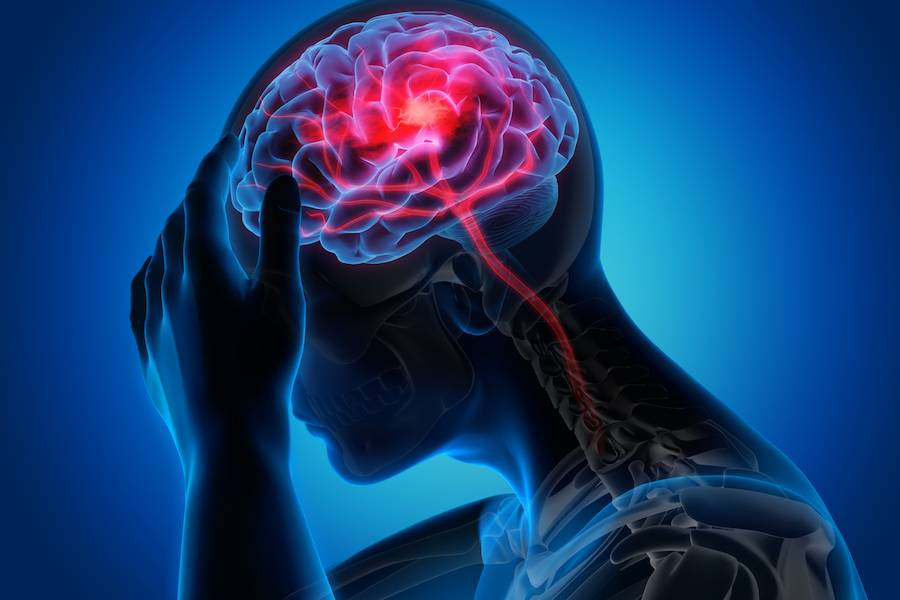


**SOURCE OF THE DATASET USED:** The dataset used for this project is available on Kaggle,
and contains medicals records and important features needed to effectively train models which
will be employed in making the right predictions

In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
#loading our dataset
df = pd.read_csv('stroke.csv')

**Getting the general information about the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observation: There are some missing values in the BMI column**

**Getting the general statistics of the dataset**

In [4]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

**Let's find out the number of missing values in each column**

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Observation: There are 201 total missing values in the dataset and all are in the bmi column**

**Visualizing the missing values**

<Axes: >

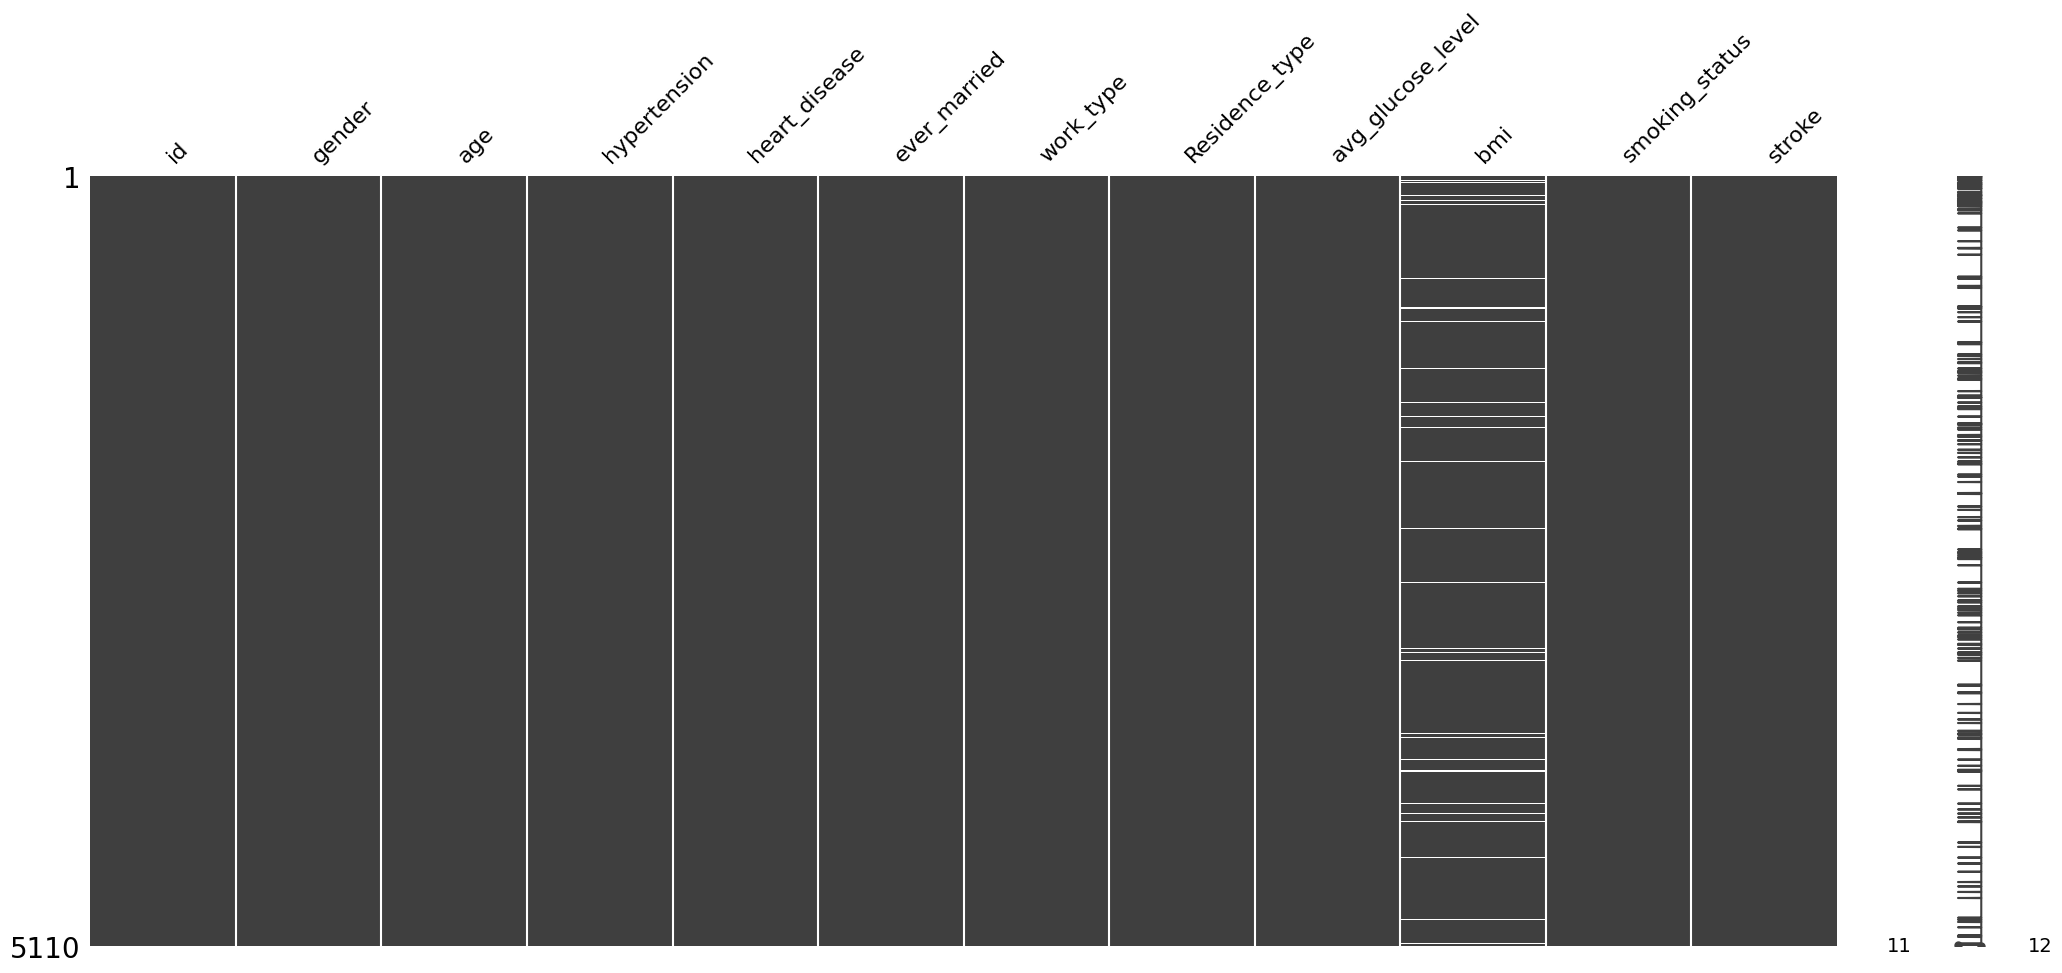

In [6]:
msno.matrix(df)

**Observation: This further confirms the number of missing values in the bmi column**

**Filling the missing values in the bmi column with the average of bmi**

In [7]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

**Checking for duplicated values in the dataset**

In [8]:
df.duplicated().sum()

0

**Observation: There are no duplicated rows**

**Unique values per column**

In [9]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique().shape[0]

pd.DataFrame(unique_values,index=['No of unique values']).transpose()

No of unique values
id                                5110
gender                               3
age                                104
hypertension                         2
heart_disease                        2
ever_married                         2
work_type                            5
Residence_type                       2
avg_glucose_level                 3979
bmi                                419
smoking_status                       4
stroke                               2

**The specific unique values in the columns**

In [10]:
columns = ['gender','hypertension','heart_disease','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

for column in columns:
    
    unique = df[column].unique()
    
    print(f'The unique values in {column} are: {unique}')

The unique values in gender are: ['Male' 'Female' 'Other']
The unique values in hypertension are: [0 1]
The unique values in heart_disease are: [1 0]
The unique values in heart_disease are: [1 0]
The unique values in ever_married are: ['Yes' 'No']
The unique values in work_type are: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
The unique values in Residence_type are: ['Urban' 'Rural']
The unique values in smoking_status are: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
The unique values in stroke are: [1 0]


**Dropping the id column because it isnt going to be used in the modelling or analysis**

In [11]:
df.drop(columns= 'id',inplace= True)

# Univariate analysis

**Finding the number of unique values in the gender column**

In [12]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

**Visualizing the number of unique values in each column**

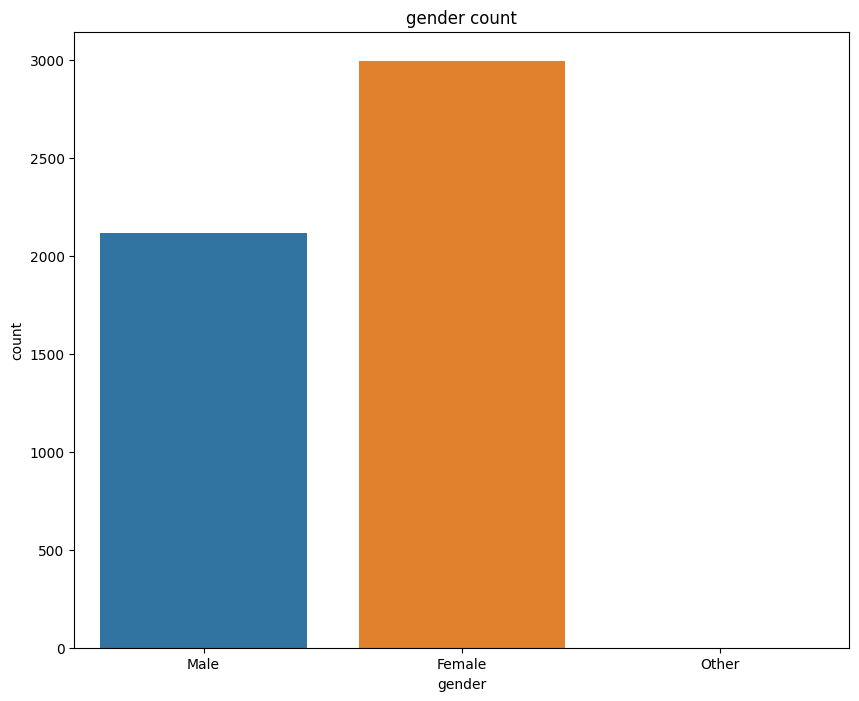

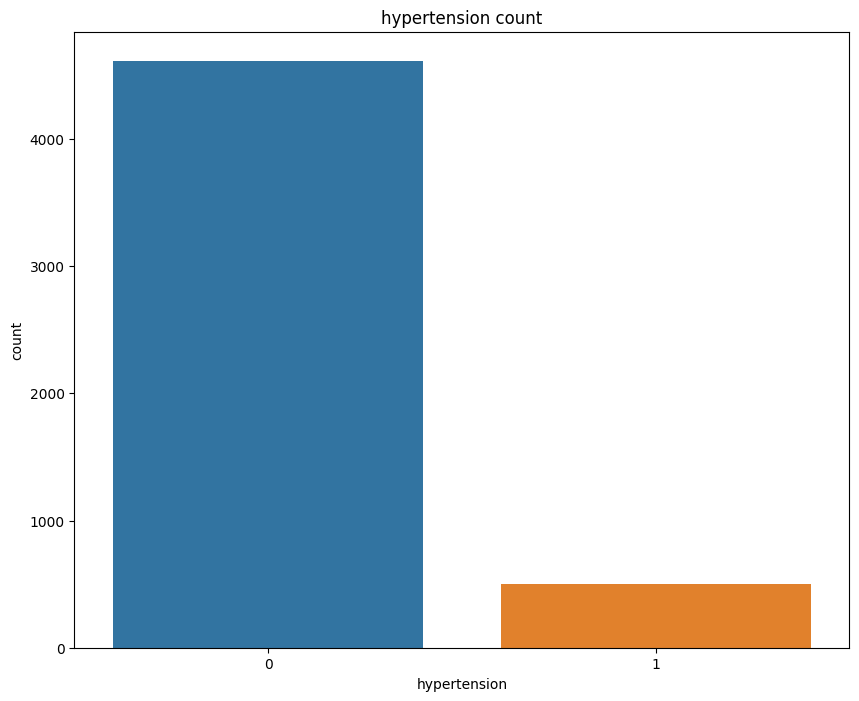

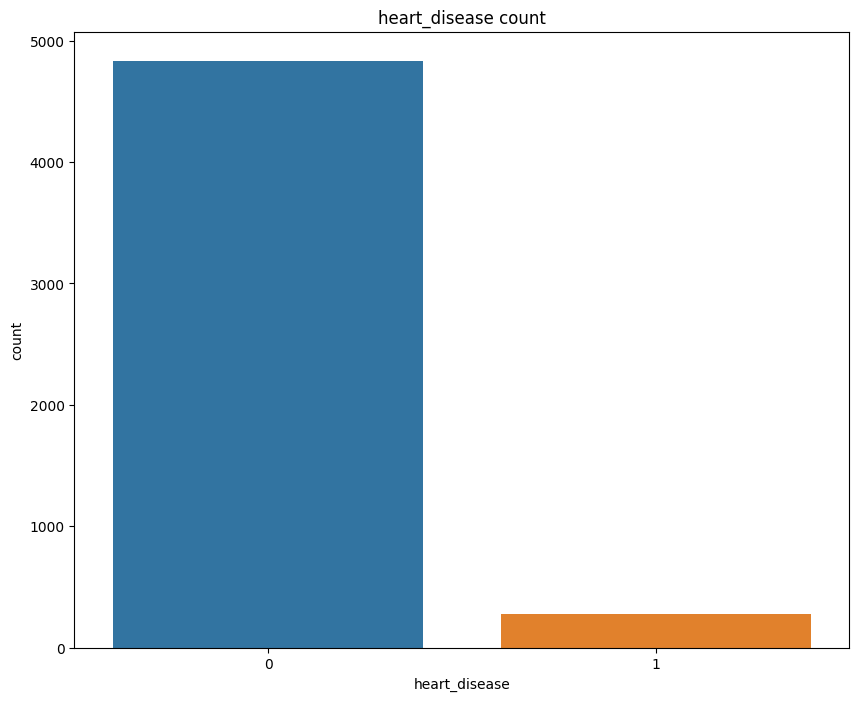

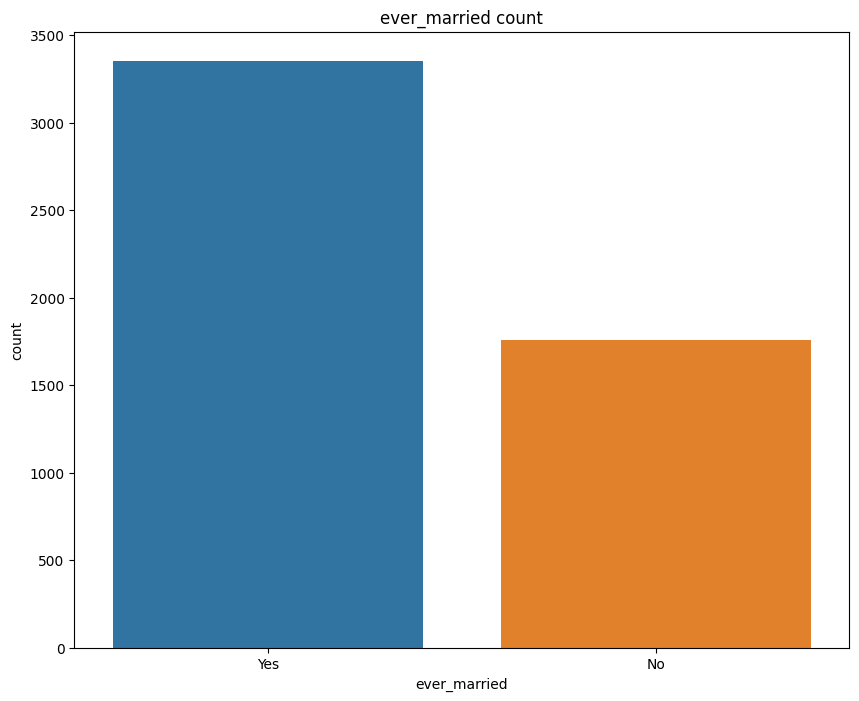

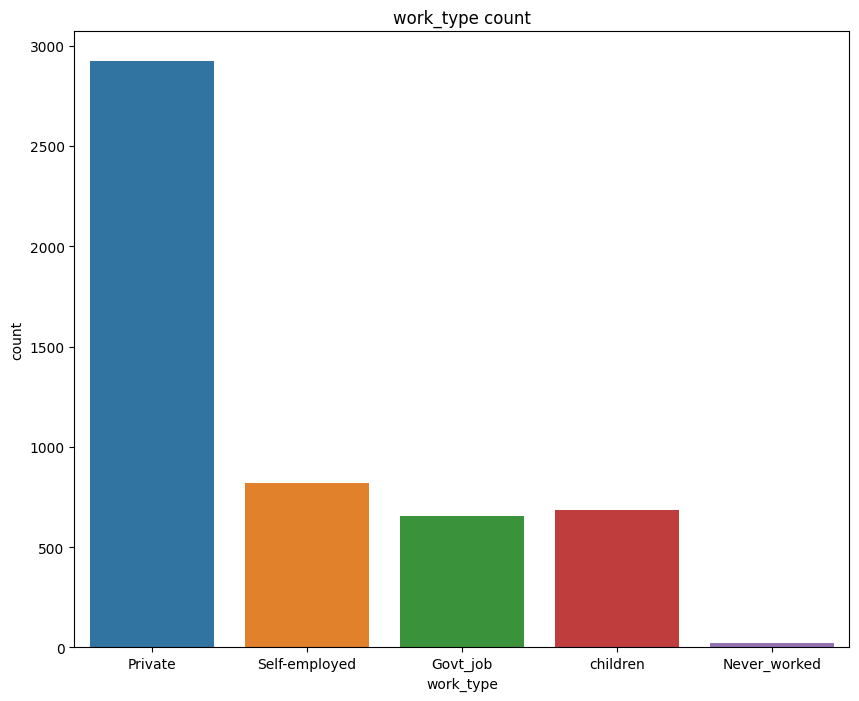

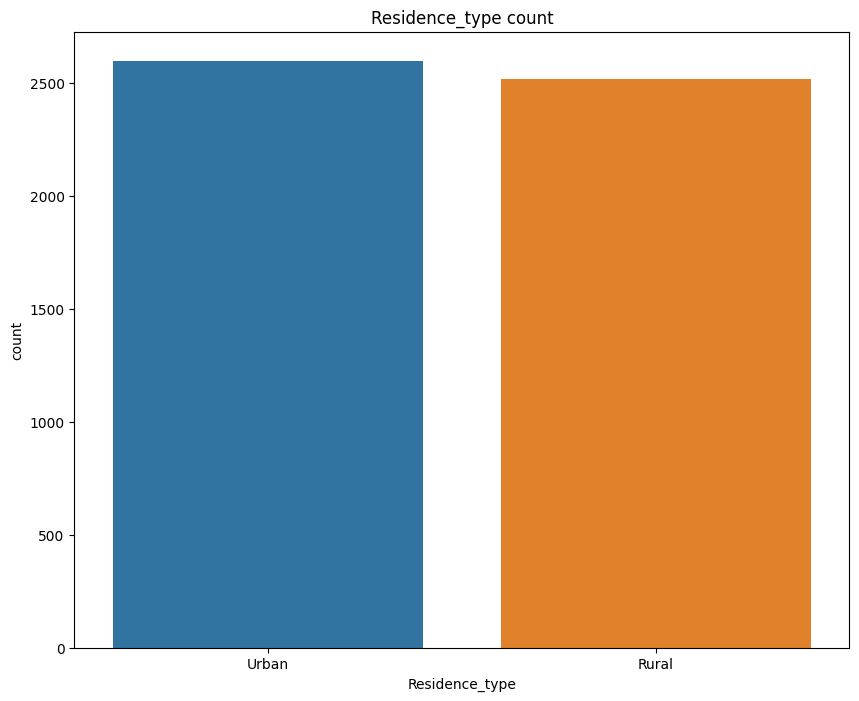

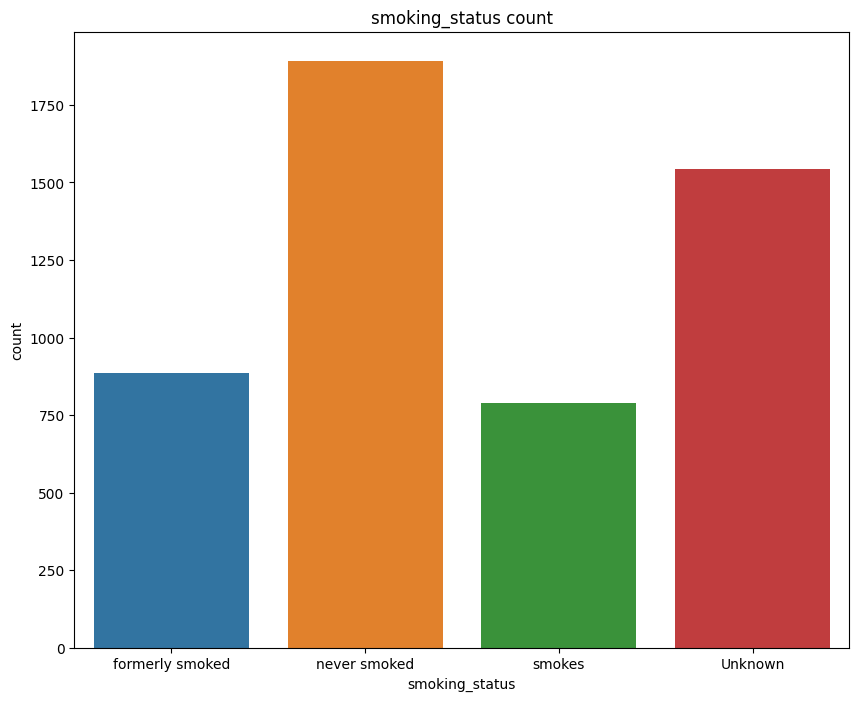

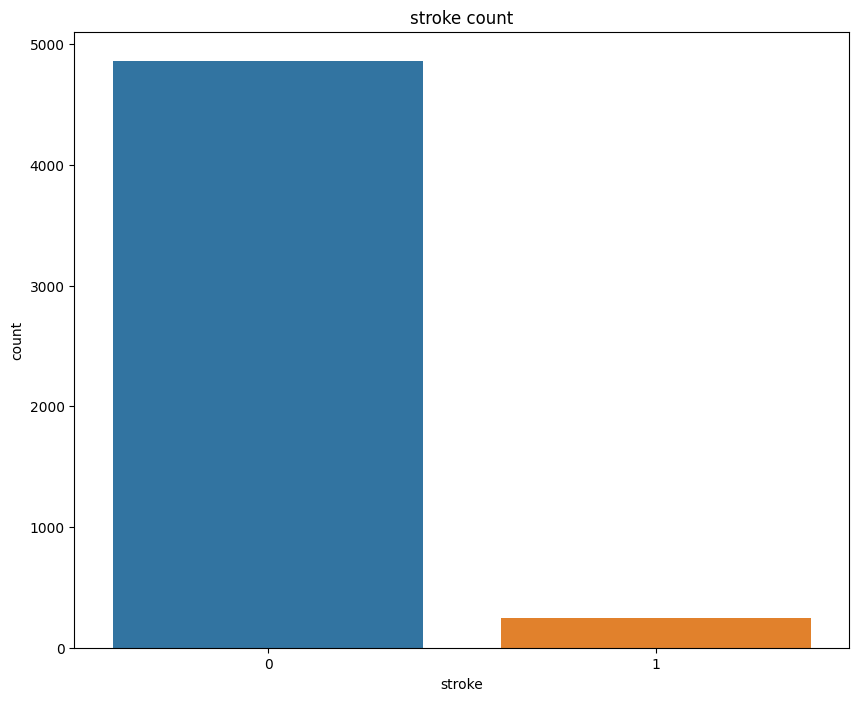

In [13]:
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for column in columns:
    plt.figure(figsize=(10, 8), facecolor='w', edgecolor='black')
    sns.countplot(data=df, x=column)
    plt.title(f'{column} count')
    plt.show()


## Age

**Distribution of the ages in the data**

Text(0.5, 1.0, 'Age Distribution')

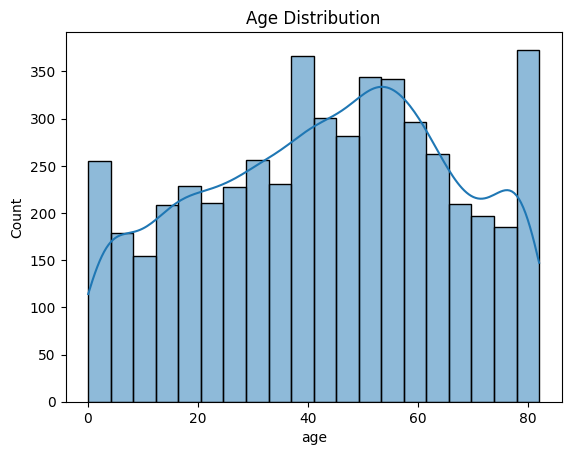

In [14]:
sns.histplot(df,x='age',kde= True)
plt.title('Age Distribution')

**Observation: Most People are aged between 54 and 60**

**Let's get further insight about the age**

In [15]:
print('Maximum age is: ',df['age'].max())

print('Minimum age is:',df['age'].min())

print('Average age is:', df['age'].mean())

Maximum age is:  82.0
Minimum age is: 0.08
Average age is: 43.226614481409


## Marital Status

**Getting the number of unique values of married people against unmarried people**

In [16]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

**Observation: The number of married people are more than the number of unmarried people**

**Visualizing the number of married and unmarried people**

In [17]:
px.pie(df,'ever_married',title= 'Proportion of married and unmarried people')

**Determine the correlation of the numeric values in the dataset**

In [18]:
#Select only the numeric values in the dataset
correlation = df.select_dtypes(include= 'number').corr()

correlation

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.325942      0.160189       0.038899           0.168751   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.325942  0.245257  
hypertension       0.160189  0.127904  
heart_disease      0.038899  0.134914  
avg_glucose_level  0.168751  0.131945  
bmi                1.000000  0.038947  
stroke             0.038947  1.000000

<Axes: title={'center': 'Correlation analysis of numerical values'}>

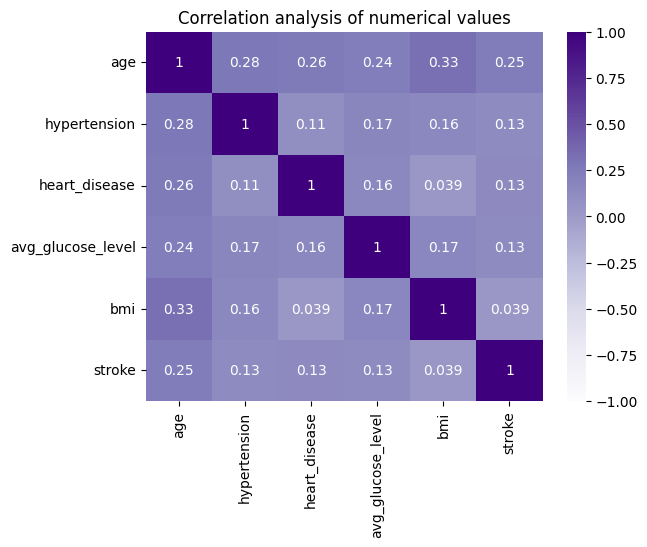

In [19]:
plt.title('Correlation analysis of numerical values')

sns.heatmap(correlation,vmin= -1,vmax= 1,annot= True,cmap= 'Purples')


**Observation: There is no significant correlation in the dataset**

**Let's visualize outliers in the dataset**

In [20]:
numeric_data = df.select_dtypes(include='number')

color_sequence = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF"]

px.box(numeric_data, title='Boxplots representing outliers in the dataset', color_discrete_sequence=color_sequence)


**We dont have to drop the outliers becaue its possible for people to have abnormal average glucose level**

# Feature Engineering

## Age

**Creating the conditions for age group based on age**

In [21]:
def age_group(age):
    if age > 0 and age <= 18:
        return 'Children'
    elif age > 18 and age <=35:
        return 'Youth'
    elif age > 35 and age <=60:
        return 'Adult'
    else:
        return 'Senior'
    
df['age_group'] = df['age'].apply(age_group)


## BMI

In [22]:
print('Maximum bmi is: ',df['bmi'].max())

print('Minimum bmi is:',df['bmi'].min())

print('Average bmi is:', df['bmi'].mean())

Maximum bmi is:  97.6
Minimum bmi is: 10.3
Average bmi is: 28.893236911794663


**Creating conditions for the bmi group based on bmi**

In [23]:
def bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'NormalWeight'
    elif bmi >= 25 and bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

df['bmi_group'] = df['bmi'].apply(bmi_group)



## Glucose Level

**Creating conditions for the glucose group based on glucose level**

In [24]:
def glucose_group(glucose):
    if glucose >= 0 and glucose < 70:
        return 'Low'
    elif glucose >= 70 and glucose <= 99:
        return 'Normal'
    elif glucose >= 100 and glucose <= 125:
        return 'Elevated'
    else:
        return 'Very High'

df['glucose_group'] = df['avg_glucose_level'].apply(glucose_group)


# Bivariate analysis

**Checking to see what age group is more likely to get stroke**

Text(0.5, 1.0, 'Stroke by age Group')

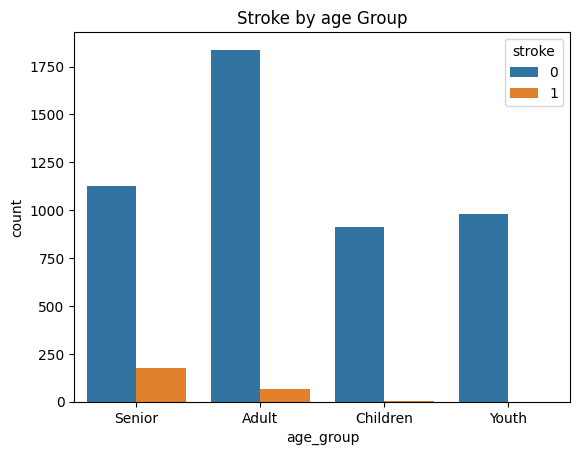

In [25]:
sns.countplot(df,x='age_group',hue= 'stroke')
plt.title('Stroke by age Group')

**Observation: Seniors are more likely to get stroke, followed by adults, then children and finally youth**

**Checking to see what bmi group is more likely to get stroke**

Text(0.5, 1.0, 'Stroke by bmi Group')

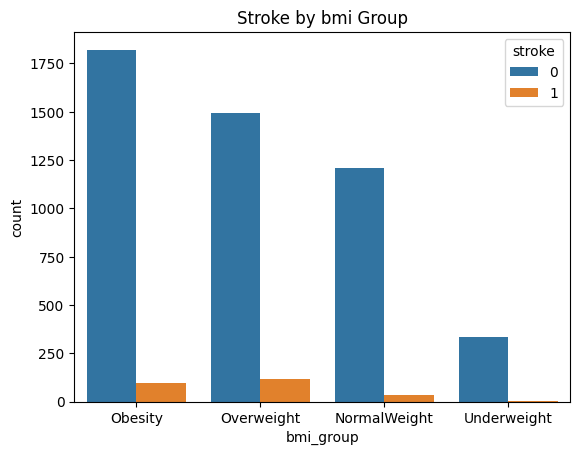

In [26]:
sns.countplot(df,x='bmi_group',hue= 'stroke')
plt.title('Stroke by bmi Group')

**Observation: Overwieght people are more likely to get stroke, followed by the Obese, then Normal Weight and finally the underweight**

# Multivariate analysis

**The relationship between age, average glucose level and bmi**

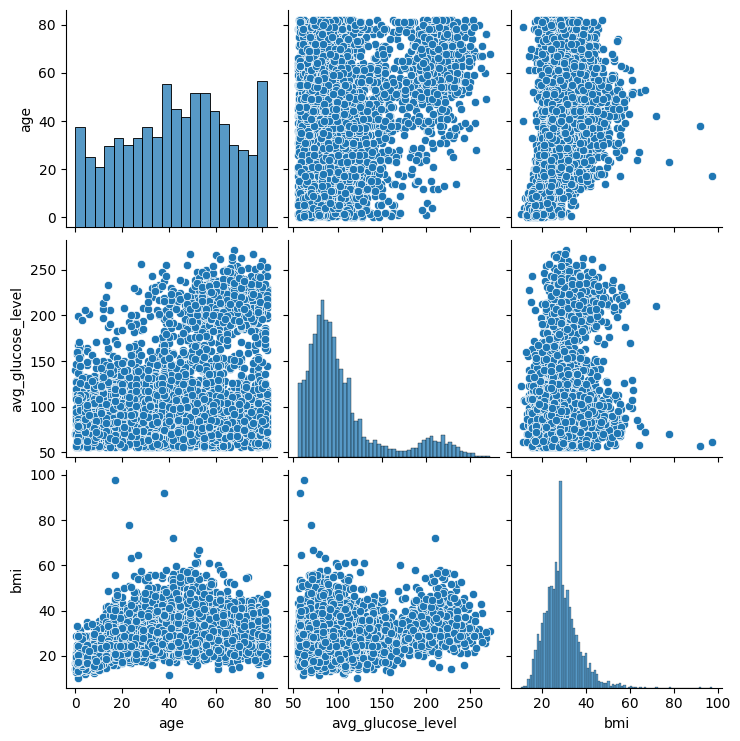

In [27]:
columns = ['age', 'avg_glucose_level', 'bmi']

sns.pairplot(numeric_data[columns])

plt.show()


# Machine Learning

In [28]:
columns = ['gender','hypertension','heart_disease','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

for column in columns:
    
    unique = df[column].unique()
    
    print(f'The unique values in {column} are: {unique}')

The unique values in gender are: ['Male' 'Female' 'Other']
The unique values in hypertension are: [0 1]
The unique values in heart_disease are: [1 0]
The unique values in heart_disease are: [1 0]
The unique values in ever_married are: ['Yes' 'No']
The unique values in work_type are: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
The unique values in Residence_type are: ['Urban' 'Rural']
The unique values in smoking_status are: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
The unique values in stroke are: [1 0]


## Binary encoding

In [29]:
#Encoding categorical values with two unique values

binary_columns= ['ever_married','Residence_type','gender']

labelencoder= LabelEncoder()

for column in binary_columns:
    df[column] = labelencoder.fit_transform(df[column])

In [30]:
#Encoding more than two unique values

encoded = ['bmi_group','age_group','glucose_group']

for column in encoded:
    df[column] = labelencoder.fit_transform(df[column])
    


In [31]:
#Encoding the rest of the categorical data
df = pd.get_dummies(df,columns=['work_type','smoking_status'],dtype= int)

## Modelling of the data

**Separating features from the target and scaling the features with a standard scale**

In [32]:
x = df.drop(columns= 'stroke')

y = df['stroke']

scaler = StandardScaler()

x = scaler.fit_transform(x)

**Splitting the data into training and testing data**

**Splitting the data into 10 different parts, then using 9 to test**

In [33]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)

kfold = model_selection.KFold(n_splits= 10)

**Appending the different Classification models into a list**

In [34]:
models= []

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('DTC', DecisionTreeClassifier()))

models.append(('RF', RandomForestClassifier()))

results= []

names= []

scoring = 'accuracy'

**Finding the accuracy of each of our classification models**

In [35]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    
    cv_results= model_selection.cross_val_score(model, x_train, y_train, cv= kfold, scoring=scoring)
    
    results.append(cv_results)
    
    names.append(name)
    
    msg= '%s %f (%f)' % (name, cv_results.mean(),cv_results.std())
    
    print(msg)

LR 0.952296 (0.005310)
LDA 0.944712 (0.005748)
KNN 0.949114 (0.006216)
NB 0.186152 (0.018585)
SVM 0.952296 (0.005846)
CART 0.906795 (0.014726)
DTC 0.911934 (0.010050)
RF 0.951071 (0.007542)


**Observation: The most accurate model are SVM and Logistic Regression, the least accurate model is the Naive Bayes**

**Of the eight models 7 of them have an accuracy of over 90%**

**Creating a boxplot to visualize the accuracy of the models**

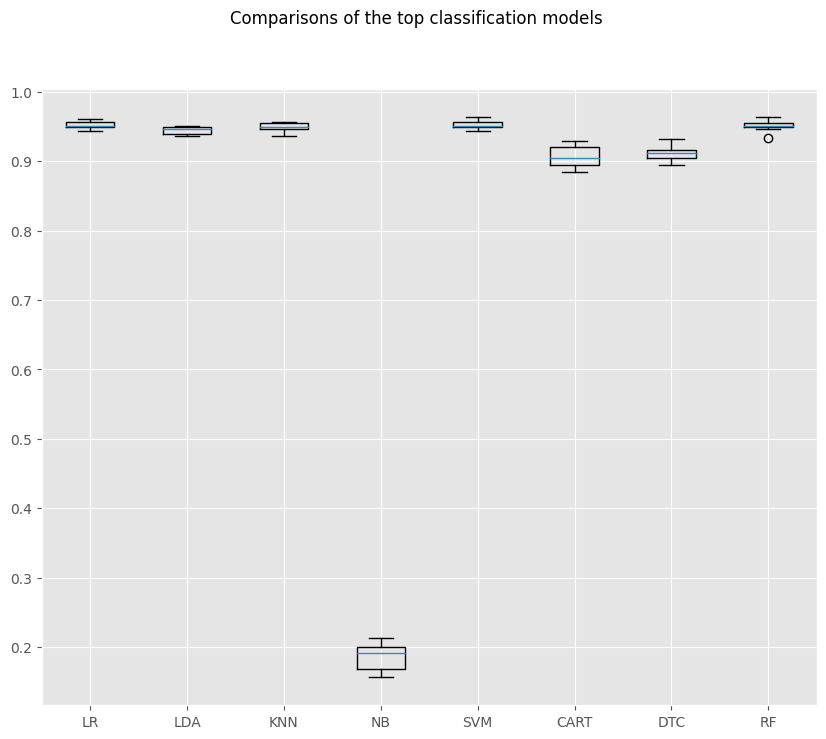

In [36]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,8))

fig.suptitle('Comparisons of the top classification models')

ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names)

plt.show()


**This further confirms the previous observation that all the models are above 90% on accuracy bar Naive Bayes**

**The end**

**By Chris Olande**